In [34]:
import pandas as pd
import plotly as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [35]:
sale_df =pd.read_csv('Metro_invt_fs_uc_sfr_sm_month.csv')
sale_df.head(10)
# For sale listings per month

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,102001,0,United States,country,NaN,1256841.0,1326695.0,1412965.0,1479262.0,1527468.0,...,734588.0,742155.0,774262.0,801169.0,825009.0,844710.0,853587.0,868725.0,859587.0,821812.0
1,394913,1,"New York, NY",msa,NY,52726.0,57399.0,62374.0,66396.0,68302.0,...,24646.0,24955.0,25893.0,26405.0,26465.0,26021.0,25255.0,25182.0,24498.0,22783.0
2,753899,2,"Los Angeles, CA",msa,CA,17825.0,19309.0,20822.0,22059.0,23397.0,...,13155.0,13074.0,13363.0,13508.0,13558.0,13635.0,13665.0,14054.0,13865.0,12983.0
3,394463,3,"Chicago, IL",msa,IL,29930.0,32526.0,35219.0,36854.0,38278.0,...,19674.0,20028.0,21008.0,21656.0,21896.0,22070.0,22066.0,22496.0,21952.0,20302.0
4,394514,4,"Dallas, TX",msa,TX,22961.0,24748.0,27040.0,29241.0,31113.0,...,16320.0,17220.0,19181.0,20894.0,21860.0,22333.0,22390.0,22477.0,22261.0,21506.0
5,394692,5,"Houston, TX",msa,TX,24829.0,26543.0,28791.0,30278.0,31523.0,...,19336.0,19660.0,20342.0,20855.0,21636.0,22190.0,22213.0,22026.0,21672.0,20961.0
6,395209,6,"Washington, DC",msa,VA,17731.0,20762.0,23443.0,23423.0,21792.0,...,9306.0,9868.0,10736.0,10903.0,10624.0,10264.0,9947.0,9812.0,9304.0,8244.0
7,394974,7,"Philadelphia, PA",msa,PA,23376.0,25246.0,26932.0,27697.0,27182.0,...,11437.0,11737.0,12282.0,12461.0,12441.0,12408.0,12418.0,12699.0,12515.0,11653.0
8,394856,8,"Miami, FL",msa,FL,27420.0,27592.0,27531.0,27005.0,26568.0,...,17135.0,16335.0,15696.0,15072.0,14832.0,14768.0,14865.0,15445.0,16068.0,16582.0
9,394347,9,"Atlanta, GA",msa,GA,22927.0,24071.0,25436.0,26472.0,27513.0,...,17124.0,16808.0,17113.0,17459.0,18033.0,18444.0,18693.0,19022.0,19072.0,18473.0


In [36]:
sale_df['RegionName'].unique()

array(['United States', 'New York, NY', 'Los Angeles, CA', 'Chicago, IL',
       'Dallas, TX', 'Houston, TX', 'Washington, DC', 'Philadelphia, PA',
       'Miami, FL', 'Atlanta, GA', 'Boston, MA', 'Phoenix, AZ',
       'San Francisco, CA', 'Riverside, CA', 'Detroit, MI', 'Seattle, WA',
       'Minneapolis, MN', 'San Diego, CA', 'Tampa, FL', 'Denver, CO',
       'Baltimore, MD', 'St. Louis, MO', 'Orlando, FL', 'Charlotte, NC',
       'San Antonio, TX', 'Portland, OR', 'Sacramento, CA',
       'Pittsburgh, PA', 'Cincinnati, OH', 'Austin, TX', 'Las Vegas, NV',
       'Kansas City, MO', 'Columbus, OH', 'Indianapolis, IN',
       'Cleveland, OH', 'San Jose, CA', 'Nashville, TN',
       'Virginia Beach, VA', 'Providence, RI', 'Jacksonville, FL',
       'Milwaukee, WI', 'Oklahoma City, OK', 'Raleigh, NC', 'Memphis, TN',
       'Richmond, VA', 'Louisville, KY', 'New Orleans, LA',
       'Salt Lake City, UT', 'Hartford, CT', 'Buffalo, NY',
       'Birmingham, AL', 'Rochester, NY', 'Grand Rapids

In [37]:
values_df = pd.read_csv('State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
values_df.head(10)
# Zillow Home values index (ZHVI)
# IMPORTANT STATES: [CA, TX, FL, NY, PA]

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,9,0,California,state,NaN,184934.316357,185555.935794,186395.274250,188217.227773,190334.974283,...,700645.417980,700071.790442,702993.413576,708109.782990,715006.691673,722810.830530,730268.503111,736332.486797,740671.921245,743434.729197
1,54,1,Texas,state,NaN,108651.915493,108710.959751,108739.597141,108881.727046,108973.772602,...,293015.813177,292651.823251,292966.319007,293782.318512,294517.200523,295087.477528,295124.789296,294898.327140,294417.715350,293824.060476
2,14,2,Florida,state,NaN,105562.864543,105791.523534,106068.703810,106632.140020,107239.745255,...,378905.178430,379344.093513,380382.617962,382034.246422,383713.911859,385378.442796,386536.027985,387584.884146,388504.505535,389325.245410
3,43,3,New York,state,NaN,151332.776013,151871.669351,152390.441094,153506.178086,154660.567033,...,430860.488993,432344.784056,434774.062081,437629.211834,440656.724847,443733.624198,446344.733234,448195.711473,449741.470945,451434.182956
4,47,4,Pennsylvania,state,NaN,96293.945384,96499.910841,96693.463044,97087.893024,97493.071373,...,243504.365704,244306.951388,245814.703016,247602.348582,249341.677802,251008.430940,252308.868444,253189.352626,253718.399927,254151.927536
5,21,5,Illinois,state,NaN,123437.667880,123536.591687,123750.419933,124253.448063,124850.306662,...,234771.175994,236088.328320,237907.502972,239989.378514,241936.049926,243850.557222,245314.828108,246492.756924,247326.305012,247947.849104
6,44,6,Ohio,state,NaN,101966.849657,102029.160651,102123.658578,102401.534292,102825.225655,...,201471.383911,202777.618308,204653.286642,206755.228480,208665.747116,210183.952192,211315.194492,212111.346698,212725.476823,213149.087494
7,16,7,Georgia,state,NaN,120292.680630,120565.844506,120881.029999,121544.633810,122276.562383,...,304249.627650,305150.191291,306620.745118,308270.832324,309927.318891,311569.598620,313003.757875,314177.832709,315043.558679,315611.706086
8,36,8,North Carolina,state,NaN,124638.304235,124827.925303,125023.231196,125446.884175,125918.857135,...,304191.612222,305201.971446,306781.321482,308652.981139,310411.400610,312139.973983,313558.825231,314669.605925,315619.755461,316102.645449
9,30,9,Michigan,state,NaN,112096.013662,112157.753470,112383.787159,112834.045379,113498.044845,...,219221.630353,220335.319321,221952.491296,223600.483527,224882.071238,226037.513807,226935.388182,227650.095417,228076.118487,228329.287519


In [38]:
values_df['RegionName'].unique()

array(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania',
       'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan',
       'New Jersey', 'Virginia', 'Washington', 'Arizona', 'Massachusetts',
       'Tennessee', 'Indiana', 'Maryland', 'Missouri', 'Wisconsin',
       'Colorado', 'Minnesota', 'South Carolina', 'Alabama', 'Louisiana',
       'Kentucky', 'Oregon', 'Oklahoma', 'Connecticut', 'Utah', 'Iowa',
       'Nevada', 'Arkansas', 'Mississippi', 'Kansas', 'New Mexico',
       'Nebraska', 'Idaho', 'West Virginia', 'Hawaii', 'New Hampshire',
       'Maine', 'Rhode Island', 'Montana', 'Delaware', 'South Dakota',
       'North Dakota', 'Alaska', 'District of Columbia', 'Vermont',
       'Wyoming'], dtype=object)

In [39]:
median_df = pd.read_csv('Metro_mlp_uc_sfr_sm_month.csv')
median_df.head(10)
# Median list price values per month

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,102001,0,United States,country,NaN,262433.0,270467.0,277133.0,280500.0,280800.0,...,374000.0,381667.0,389667.0,396167.0,399167.0,397833.0,396333.0,393300.0,389967.0,384633.0
1,394913,1,"New York, NY",msa,NY,492633.0,499333.0,507966.0,516633.0,522967.0,...,634633.0,644967.0,658300.0,666667.0,676600.0,676998.0,681938.0,684967.0,687902.0,687629.0
2,753899,2,"Los Angeles, CA",msa,CA,778333.0,791667.0,799667.0,806300.0,805967.0,...,929966.0,961633.0,981333.0,1014667.0,1058000.0,1085000.0,1100000.0,1075000.0,1065000.0,1033333.0
3,394463,3,"Chicago, IL",msa,IL,295800.0,309133.0,317600.0,321567.0,319933.0,...,309967.0,320000.0,329967.0,337967.0,344300.0,344333.0,342666.0,336333.0,332167.0,325833.0
4,394514,4,"Dallas, TX",msa,TX,325253.0,330319.0,333613.0,333632.0,330298.0,...,404630.0,416630.0,432667.0,444300.0,448967.0,446300.0,442833.0,437167.0,432167.0,427300.0
5,394692,5,"Houston, TX",msa,TX,294633.0,298000.0,299666.0,299996.0,299663.0,...,351300.0,357967.0,366332.0,372998.0,374998.0,373000.0,370317.0,366982.0,363982.0,361082.0
6,395209,6,"Washington, DC",msa,VA,421667.0,438300.0,446633.0,454967.0,458333.0,...,536667.0,556551.0,572884.0,581217.0,589333.0,586300.0,589300.0,589300.0,592667.0,579633.0
7,394974,7,"Philadelphia, PA",msa,PA,226600.0,235800.0,245800.0,254133.0,257967.0,...,295000.0,303333.0,312625.0,320958.0,323958.0,322967.0,322967.0,323300.0,323300.0,316633.0
8,394856,8,"Miami, FL",msa,FL,427500.0,431000.0,433333.0,435300.0,433300.0,...,654667.0,674667.0,691333.0,699666.0,700000.0,700000.0,700000.0,700000.0,703333.0,710000.0
9,394347,9,"Atlanta, GA",msa,GA,288933.0,298967.0,307996.0,311329.0,307963.0,...,366667.0,376000.0,387333.0,395667.0,399633.0,399633.0,397967.0,394633.0,389967.0,384933.0


In [40]:
median_df['RegionName'].unique()

array(['United States', 'New York, NY', 'Los Angeles, CA', 'Chicago, IL',
       'Dallas, TX', 'Houston, TX', 'Washington, DC', 'Philadelphia, PA',
       'Miami, FL', 'Atlanta, GA', 'Boston, MA', 'Phoenix, AZ',
       'San Francisco, CA', 'Riverside, CA', 'Detroit, MI', 'Seattle, WA',
       'Minneapolis, MN', 'San Diego, CA', 'Tampa, FL', 'Denver, CO',
       'Baltimore, MD', 'St. Louis, MO', 'Orlando, FL', 'Charlotte, NC',
       'San Antonio, TX', 'Portland, OR', 'Sacramento, CA',
       'Pittsburgh, PA', 'Cincinnati, OH', 'Austin, TX', 'Las Vegas, NV',
       'Kansas City, MO', 'Columbus, OH', 'Indianapolis, IN',
       'Cleveland, OH', 'San Jose, CA', 'Nashville, TN',
       'Virginia Beach, VA', 'Providence, RI', 'Jacksonville, FL',
       'Milwaukee, WI', 'Oklahoma City, OK', 'Raleigh, NC', 'Memphis, TN',
       'Richmond, VA', 'Louisville, KY', 'New Orleans, LA',
       'Salt Lake City, UT', 'Hartford, CT', 'Buffalo, NY',
       'Birmingham, AL', 'Rochester, NY', 'Grand Rapids

In [41]:
rental_df = pd.read_csv('Metro_zori_uc_sfrcondomfr_sm_month.csv')
rental_df.head(10)

# Zillow Observed Rent Index (ZORI) 

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,102001,0,United States,country,NaN,1228.784000,1235.398148,1244.250266,1254.031553,1263.701003,...,1913.956669,1925.722531,1938.436985,1949.104671,1958.921667,1965.026120,1967.696149,1965.445809,1960.639200,1957.392338
1,394913,1,"New York, NY",msa,NY,2286.942293,2302.441587,2319.715402,2341.394932,2356.920054,...,3048.279317,3083.461047,3122.358850,3158.258686,3181.961464,3190.587265,3189.132743,3173.037996,3150.806602,3132.049652
2,753899,2,"Los Angeles, CA",msa,CA,1822.376921,1834.225694,1849.513160,1863.634189,1877.945479,...,2822.067602,2837.442789,2844.700862,2855.432098,2868.402216,2880.681567,2884.888133,2881.923174,2868.529586,2858.240835
3,394463,3,"Chicago, IL",msa,IL,1385.601820,1392.861993,1403.350024,1412.784123,1423.690042,...,1853.085095,1869.257387,1891.523391,1911.393405,1923.784328,1930.812987,1928.529028,1921.225502,1913.675928,1916.033603
4,394514,4,"Dallas, TX",msa,TX,1114.978459,1119.825663,1127.669715,1138.626074,1148.650766,...,1764.604262,1769.302745,1776.777795,1784.825318,1793.402761,1795.131755,1791.183665,1783.781237,1777.050882,1768.792067
5,394692,5,"Houston, TX",msa,TX,1239.202535,1243.535766,1250.372313,1262.488573,1272.356245,...,1638.255261,1644.021405,1653.855104,1663.647065,1671.065141,1672.371522,1670.027797,1664.604969,1659.339327,1657.888554
6,395209,6,"Washington, DC",msa,VA,1717.578935,1724.552804,1736.347970,1744.348354,1753.900472,...,2195.895451,2214.133077,2232.863206,2251.937153,2268.056596,2278.883059,2283.945407,2282.914523,2278.727630,2272.526413
7,394974,7,"Philadelphia, PA",msa,PA,1253.795732,1260.135078,1272.486949,1279.829845,1286.623364,...,1750.648128,1757.967031,1768.688606,1774.617896,1783.468860,1792.140087,1804.543373,1811.564338,1812.540628,1808.097494
8,394856,8,"Miami, FL",msa,FL,1494.054348,1500.869140,1506.447792,1513.276356,1522.849280,...,2652.336231,2662.421553,2671.683253,2680.275458,2686.605616,2691.615507,2695.493960,2705.471817,2710.570325,2707.492590
9,394347,9,"Atlanta, GA",msa,GA,1056.278664,1062.030248,1065.649400,1076.566445,1084.359648,...,1910.120937,1920.647347,1926.599114,1927.731508,1929.044645,1929.664547,1930.066399,1920.491734,1906.925102,1896.526334


In [42]:
rental_df['RegionName'].unique()

array(['United States', 'New York, NY', 'Los Angeles, CA', 'Chicago, IL',
       'Dallas, TX', 'Houston, TX', 'Washington, DC', 'Philadelphia, PA',
       'Miami, FL', 'Atlanta, GA', 'Boston, MA', 'Phoenix, AZ',
       'San Francisco, CA', 'Riverside, CA', 'Detroit, MI', 'Seattle, WA',
       'Minneapolis, MN', 'San Diego, CA', 'Tampa, FL', 'Denver, CO',
       'Baltimore, MD', 'St. Louis, MO', 'Orlando, FL', 'Charlotte, NC',
       'San Antonio, TX', 'Portland, OR', 'Sacramento, CA',
       'Pittsburgh, PA', 'Cincinnati, OH', 'Austin, TX', 'Las Vegas, NV',
       'Kansas City, MO', 'Columbus, OH', 'Indianapolis, IN',
       'Cleveland, OH', 'San Jose, CA', 'Nashville, TN',
       'Virginia Beach, VA', 'Providence, RI', 'Jacksonville, FL',
       'Milwaukee, WI', 'Oklahoma City, OK', 'Raleigh, NC', 'Memphis, TN',
       'Richmond, VA', 'Louisville, KY', 'New Orleans, LA',
       'Salt Lake City, UT', 'Hartford, CT', 'Buffalo, NY',
       'Birmingham, AL', 'Rochester, NY', 'Grand Rapids

In [43]:
# rental_df = rental_df.drop(columns=['MSA','State'])
rental_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,102001,0,United States,country,NaN,1228.784000,1235.398148,1244.250266,1254.031553,1263.701003,...,1913.956669,1925.722531,1938.436985,1949.104671,1958.921667,1965.026120,1967.696149,1965.445809,1960.639200,1957.392338
1,394913,1,"New York, NY",msa,NY,2286.942293,2302.441587,2319.715402,2341.394932,2356.920054,...,3048.279317,3083.461047,3122.358850,3158.258686,3181.961464,3190.587265,3189.132743,3173.037996,3150.806602,3132.049652
2,753899,2,"Los Angeles, CA",msa,CA,1822.376921,1834.225694,1849.513160,1863.634189,1877.945479,...,2822.067602,2837.442789,2844.700862,2855.432098,2868.402216,2880.681567,2884.888133,2881.923174,2868.529586,2858.240835
3,394463,3,"Chicago, IL",msa,IL,1385.601820,1392.861993,1403.350024,1412.784123,1423.690042,...,1853.085095,1869.257387,1891.523391,1911.393405,1923.784328,1930.812987,1928.529028,1921.225502,1913.675928,1916.033603
4,394514,4,"Dallas, TX",msa,TX,1114.978459,1119.825663,1127.669715,1138.626074,1148.650766,...,1764.604262,1769.302745,1776.777795,1784.825318,1793.402761,1795.131755,1791.183665,1783.781237,1777.050882,1768.792067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,395004,872,"Prineville, OR",msa,OR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1819.206566,1823.750000
566,394687,875,"Hood River, OR",msa,OR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2450.000000
567,395198,882,"Wahpeton, ND",msa,ND,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,717.333333
568,394996,915,"Portales, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1078.232946,1068.285591,1069.632048,1050.852853,1061.295451,1037.437673,1082.830223,1086.904762


In [44]:
conditions = ['2015-','2016-','2017-','RegionID','SizeRank','RegionType']
to_drop = rental_df.columns[rental_df.columns.str.contains('|'.join(conditions))]
rental_df_filtered = rental_df.loc[rental_df["StateName"].isin(["TX", "CA", "FL", "PA", "NY"])]
rental_df_filtered = rental_df_filtered.drop(columns=to_drop)
rental_df_filtered

,RegionName,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
1,"New York, NY",NY,2441.337827,2448.402209,2461.286766,2481.573326,2499.704855,2517.481585,2529.569964,2538.462032,...,3048.279317,3083.461047,3122.358850,3158.258686,3181.961464,3190.587265,3189.132743,3173.037996,3150.806602,3132.049652
2,"Los Angeles, CA",CA,2166.510408,2177.260092,2188.630177,2199.502531,2208.542089,2220.133360,2229.969997,2238.980620,...,2822.067602,2837.442789,2844.700862,2855.432098,2868.402216,2880.681567,2884.888133,2881.923174,2868.529586,2858.240835
4,"Dallas, TX",TX,1285.875682,1292.382479,1300.367338,1307.680514,1312.387701,1320.421301,1324.381921,1326.670272,...,1764.604262,1769.302745,1776.777795,1784.825318,1793.402761,1795.131755,1791.183665,1783.781237,1777.050882,1768.792067
5,"Houston, TX",TX,1327.947037,1333.725325,1334.305522,1342.002130,1344.064508,1350.160187,1350.053837,1349.234250,...,1638.255261,1644.021405,1653.855104,1663.647065,1671.065141,1672.371522,1670.027797,1664.604969,1659.339327,1657.888554
7,"Philadelphia, PA",PA,1361.291210,1369.327937,1379.475960,1389.147640,1397.176212,1401.230068,1402.494886,1401.506303,...,1750.648128,1757.967031,1768.688606,1774.617896,1783.468860,1792.140087,1804.543373,1811.564338,1812.540628,1808.097494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,"Lewisburg, PA",PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1697.500000
533,"Stephenville, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1072.884795,1129.106572,1166.978024,1289.139982,1287.951987,1267.127041,1196.401351,1171.086144,1192.977248,1205.444444
543,"Lock Haven, PA",PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,832.994367,910.960699,852.858679,865.381132,882.028560,903.704173,886.265862,878.333333
551,"Bay City, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919.120359,970.000000


In [46]:
# Transposing and reformatting the table
rental_reindexed = rental_df_filtered.set_index(rental_df_filtered['RegionName']).drop(columns=['RegionName', 'StateName'])
rental_transposed = rental_reindexed.T
rental_transposed = rental_transposed.reset_index()
rental_transposed.rename(columns = {'index':'Date'}, inplace=True)
rental_transposed['Date'] = pd.to_datetime(rental_transposed['Date'])
rental_transposed.columns.names = ['']

#Imputing the mean to NaN values
# rental_final = rental_transposed.apply(lambda col: col.fillna(col.mean()))
# rental_transposed = rental_transposed.fillna()
rental_transposed
# rental_final

,Date,"New York, NY","Los Angeles, CA","Dallas, TX","Houston, TX","Philadelphia, PA","Miami, FL","San Francisco, CA","Riverside, CA","San Diego, CA",...,"Oneonta, NY","Sonora, CA","Kerrville, TX","Corsicana, TX","Cortland, NY","Lewisburg, PA","Stephenville, TX","Lock Haven, PA","Bay City, TX","Bonham, TX"
0,2018-01-31,2441.337827,2166.510408,1285.875682,1327.947037,1361.291210,1657.014993,2715.050455,1596.189289,2009.627602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-28,2448.402209,2177.260092,1292.382479,1333.725325,1369.327937,1660.177347,2730.128916,1603.620661,2021.927507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-31,2461.286766,2188.630177,1300.367338,1334.305522,1379.475960,1664.697646,2741.655261,1615.879843,2036.776795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-30,2481.573326,2199.502531,1307.680514,1342.002130,1389.147640,1669.003734,2757.754975,1626.532610,2049.249181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-31,2499.704855,2208.542089,1312.387701,1344.064508,1397.176212,1673.055674,2774.200810,1634.901665,2065.586737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-08-31,3190.587265,2880.681567,1795.131755,1672.371522,1792.140087,2691.615507,3046.243660,2474.781461,3047.643621,...,1169.907244,NaN,1701.201904,1356.169437,1243.540614,NaN,1267.127041,865.381132,NaN,NaN
68,2023-09-30,3189.132743,2884.888133,1791.183665,1670.027797,1804.543373,2695.493960,3035.265830,2476.100371,3044.229178,...,1199.628887,NaN,1691.103158,1361.454379,1192.760955,NaN,1196.401351,882.028560,NaN,NaN
69,2023-10-31,3173.037996,2881.923174,1783.781237,1664.604969,1811.564338,2705.471817,3021.474352,2491.537139,3030.226094,...,1219.641945,NaN,1665.101530,1382.491385,1172.362816,NaN,1171.086144,903.704173,NaN,NaN
70,2023-11-30,3150.806602,2868.529586,1777.050882,1659.339327,1812.540628,2710.570325,2997.640229,2490.885331,3006.703141,...,1163.140161,1604.796174,1684.023190,1368.947315,1171.796298,NaN,1192.977248,886.265862,919.120359,NaN


In [47]:
rental_transposed.describe()

,"New York, NY","Los Angeles, CA","Dallas, TX","Houston, TX","Philadelphia, PA","Miami, FL","San Francisco, CA","Riverside, CA","San Diego, CA","Tampa, FL",...,"Oneonta, NY","Sonora, CA","Kerrville, TX","Corsicana, TX","Cortland, NY","Lewisburg, PA","Stephenville, TX","Lock Haven, PA","Bay City, TX","Bonham, TX"
count,70.000000,72.000000,72.000000,72.000000,72.000000,70.000000,70.000000,72.000000,72.000000,71.000000,...,8.000000,2.000000,10.000000,12.000000,11.000000,1.0,10.000000,8.000000,2.000000,1.0
mean,2710.917451,2490.025687,1519.276848,1469.233791,1564.980179,2087.689203,2877.738028,2035.340386,2450.303142,1647.855868,...,1155.576858,1601.773087,1659.776144,1353.386699,1133.365437,1697.5,1197.909759,876.565851,944.560180,1600.0
std,265.777089,245.011209,186.063836,122.669708,145.425689,416.561031,114.714123,326.873312,359.746843,315.210154,...,46.429811,4.275290,33.243591,25.440575,88.400591,NaN,69.399299,25.724229,35.977339,NaN
min,2346.436026,2166.510408,1285.875682,1327.947037,1361.291210,1657.014993,2639.075883,1596.189289,2009.627602,1270.064350,...,1084.661861,1598.750000,1598.325559,1314.050453,979.117916,1697.5,1072.884795,832.994367,919.120359,1600.0
25%,2517.583366,2317.091387,1372.388221,1373.270447,1453.293024,1728.920496,2809.252323,1738.739354,2163.391999,1375.606415,...,1127.691893,1600.261543,1638.921602,1335.901682,1055.478532,1697.5,1168.005054,862.250519,931.840269,1600.0
50%,2600.960129,2348.823852,1414.763968,1392.835475,1496.695723,1818.920463,2878.519304,1951.726763,2260.530004,1492.192828,...,1166.523703,1601.773087,1662.031683,1363.473094,1172.362816,1697.5,1194.689300,880.180947,944.560180,1600.0
75%,3009.320664,2786.112427,1751.953525,1611.121536,1727.626216,2602.940060,2987.870148,2419.726088,2873.727274,2030.082758,...,1178.307222,1603.284630,1689.294418,1370.189146,1190.592411,1697.5,1251.706392,890.625439,957.280090,1600.0
max,3190.587265,2884.888133,1795.131755,1672.371522,1812.540628,2710.570325,3049.787602,2491.537139,3047.643621,2107.843181,...,1219.641945,1604.796174,1701.201904,1382.491385,1243.540614,1697.5,1289.139982,910.960699,970.000000,1600.0


In [48]:
# Define variables to loop/append
partials = ['CA', 'TX', 'FL', 'NY', 'PA']
years = ['2018', '2019', '2020', '2021', '2022', '2023']
state_avgs = [] #Final list to create DataFrame
monthly_trend = []

# Filter data through each year
for year in years:
    yearly_df = rental_transposed[rental_transposed['Date'].dt.year.astype(str).str.contains(year)]
    monthly_avg = []
    yearly_avg = [] # Used to store state averages within next loop
    
    # Filter data through each state
    for partial in partials:
        # Filter columns that partially match the specified string
        matching_columns = yearly_df.filter(like=partial, axis=1)
        
        # Taking the average monthly across the state
        row_average = matching_columns.mean(axis=1)

        # Average the matching columns altogether to comprise of the entire state
        state_average = matching_columns.sum().mean()

        # Append the calculated values in the list
        monthly_avg.append(row_average)
        yearly_avg.append(state_average)
    monthly_trend.append(monthly_avg)
    state_avgs.append(yearly_avg)

# Create and display the DataFrame
yearly_state_avgs = pd.DataFrame(state_avgs, columns = partials, index = years)
monthly_trend_df = pd.DataFrame(monthly_trend)
# yearly_state_avgs = yearly_state_avgs.applymap('${:,.2f}'.format)
yearly_state_avgs

,CA,TX,FL,NY,PA
2018,15644.983730,8414.748759,13465.209524,8159.261574,5796.515738
2019,16320.963404,9203.672234,14345.240742,9785.349694,6192.849309
2020,16630.930619,9338.625172,15000.620526,9855.812757,6529.668482
2021,18620.398043,9972.528884,17098.101977,11040.058482,7997.472032
2022,23994.864123,11761.548898,21338.220639,13587.252487,9771.455187
2023,26429.536398,14771.992086,23432.175989,16913.750307,12105.145115


In [49]:
monthly_df = pd.DataFrame(index=partials)
monthly_df = monthly_df.T

for i in range(6):
    loop_df = pd.DataFrame(monthly_trend[i], index=partials)
    loop_df = loop_df.T
    monthly_df = pd.concat([monthly_df, loop_df], axis=0)
monthly_df = monthly_df.set_index(rental_transposed['Date'])
monthly_df

,CA,TX,FL,NY,PA
Date,,,,,
2018-01-31,1785.043690,1054.835999,1253.735611,1187.562002,947.865290
2018-02-28,1795.046851,1059.110876,1259.311315,1191.770025,954.816762
2018-03-31,1806.310734,1063.550689,1262.566159,1195.395859,973.986759
2018-04-30,1822.358466,1067.325411,1268.245721,1164.146591,951.517665
2018-05-31,1833.560461,1074.280486,1276.801137,1169.891738,956.268861
...,...,...,...,...,...
2023-08-31,2333.770908,1373.615962,2002.327476,1579.825803,1211.036826
2023-09-30,2340.421866,1371.992855,2027.014059,1592.209068,1215.840122
2023-10-31,2341.457521,1358.999551,2023.591567,1553.872016,1216.920518


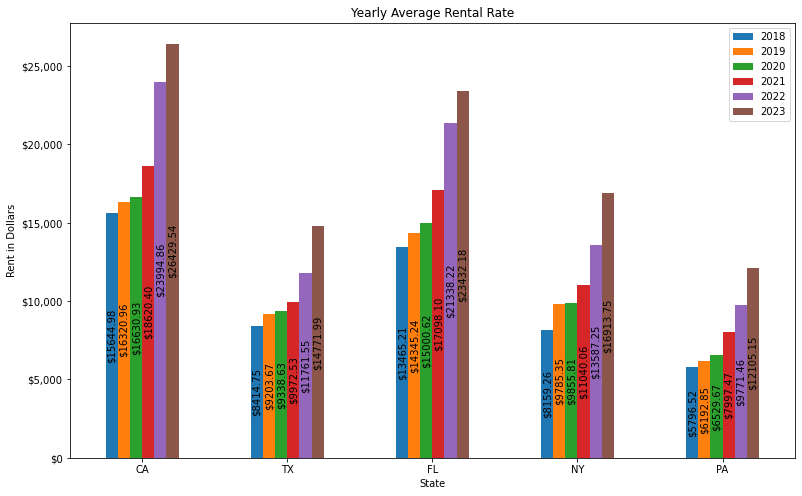

In [72]:
to_graph = yearly_state_avgs.T
year_graph = to_graph.plot.bar(figsize = (13,8), rot=0, title='Yearly Average Rental Rate',
                           ylabel='Rent in Dollars', xlabel='State')

# year_graph.bar_label(year_graph.containers[0], fmt='%d', label_type='edge', fontsize=10)

def label_formatter(x, pos):
    return "${:,.0f}".format(x)

# Apply the formatter to the y-axis ticks
year_graph.yaxis.set_major_formatter(FuncFormatter(label_formatter))

for container in year_graph.containers:
    year_graph.bar_label(container, fmt='$%.2f', label_type='center', fontsize=10, color='black',
                          rotation=90)

plt.savefig('Yearly_Average_Rentals', transparent=False, facecolor='white')

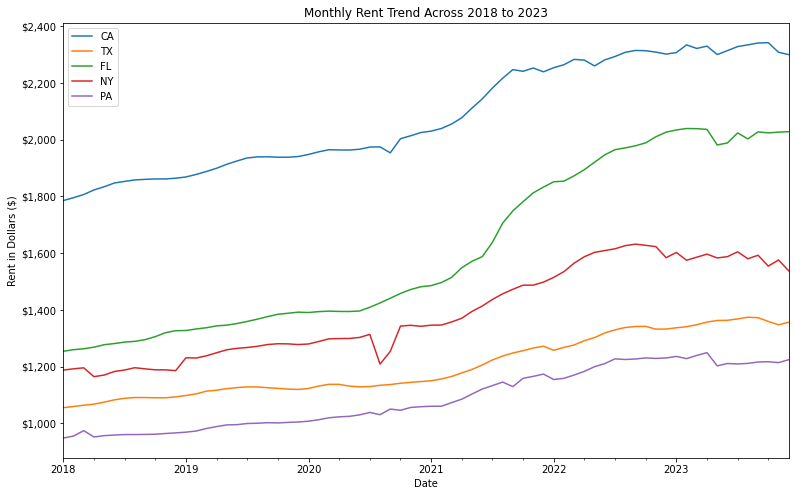

In [73]:
monthly_graph = monthly_df.plot.line(figsize = (13,8), title='Monthly Rent Trend Across 2018 to 2023', ylabel='Rent in Dollars ($)')

monthly_graph.yaxis.set_major_formatter(FuncFormatter(label_formatter))
plt.savefig('Monthly_Rental_Trend', transparent=False, facecolor='white')

In [78]:
monthly_df['NY']
selected = monthly_df['NY'].filter(like='2020')
selected

Date
2020-01-31    1279.377700
2020-02-29    1288.196580
2020-03-31    1297.521069
2020-04-30    1298.480279
2020-05-31    1298.900819
2020-06-30    1302.497103
2020-07-31    1313.177023
2020-08-31    1208.480073
2020-09-30    1253.277293
2020-10-31    1342.464301
2020-11-30    1345.285112
2020-12-31    1341.783697
Name: NY, dtype: float64

In [70]:
conditions = ['2015-','2016-','2017-','SizeRank','RegionType']
to_drop = rental_df.columns[rental_df.columns.str.contains('|'.join(conditions))]
ZORI_database = rental_df.loc[rental_df["StateName"].isin(["TX", "CA", "FL", "PA", "NY"])]
ZORI_database = ZORI_database.drop(columns=to_drop)
ZORI_database

ZORI_database.to_csv('ZORI_by_State')